In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
dataset = pd.read_csv('http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Electronics.csv')
dataset.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [2]:
dataset.columns=['User_id','Product_id','rating','Timestamp']

In [3]:
dataset.head()

,User_id,Product_id,rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
# Create a unique numeric ID for each user
unique_user_ids = dataset['User_id'].unique()
user_id_to_numeric = {user_id: idx for idx, user_id in enumerate(unique_user_ids, start=1)}
dataset['user_id_numeric'] = dataset['User_id'].map(user_id_to_numeric)

# Create a unique numeric ID for each product
unique_product_ids = dataset['Product_id'].unique()
product_id_to_numeric = {product_id: idx for idx, product_id in enumerate(unique_product_ids, start=1)}
dataset['product_id_numeric'] = dataset['Product_id'].map(product_id_to_numeric)

# Display the DataFrame
dataset.head()

,User_id,Product_id,rating,Timestamp,user_id_numeric,product_id_numeric
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,1,1
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,2,2
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,3,2
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,4,2
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600,5,3


In [5]:
dataset.tail(50)

,User_id,Product_id,rating,Timestamp,user_id_numeric,product_id_numeric
7824431,A2ZY33DQLK70QG,B00LH52WT4,5.0,1404691200,4085027,475975
7824432,A29LYS3MI7IFX9,B00LH9OL5I,5.0,1404864000,4201677,475976
7824433,A1CKXBVYL2PUYD,B00LHPXVBW,5.0,1404345600,4199263,475977
7824434,A3EF05K8Y74W6J,B00LI4U2B4,5.0,1404864000,389812,475978
7824435,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1405296000,133253,475979
7824436,A2NDJVP5ONY00D,B00LI4ZZO8,5.0,1405382400,3686006,475979
7824437,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1405209600,10553,475979
7824438,A2K47O5IHVR23E,B00LI8Y9Y6,5.0,1405728000,4201678,475980
7824439,ASS799E7X3F7O,B00LITPNRC,5.0,1405209600,196701,475981
7824440,A1W7UGF4Y843PY,B00LJO86NE,5.0,1405814400,4201679,475982


In [6]:
dataset.drop(['User_id','Product_id'],axis=1,inplace=True)

In [7]:
dataset.head()

,rating,Timestamp,user_id_numeric,product_id_numeric
0,5.0,1341100800,1,1
1,1.0,1367193600,2,2
2,3.0,1374451200,3,2
3,1.0,1334707200,4,2
4,5.0,1397433600,5,3


In [8]:
#reorder the columns
dataset = dataset[['user_id_numeric', 'product_id_numeric', 'rating', 'Timestamp']]
# Normalizing ratings
dataset['rating'] = dataset['rating'] / dataset['rating'].max()


In [9]:
#too many products lets  cut
dataset.shape

(7824481, 4)

In [10]:
#i'll pick only 50k
dataset= dataset.head(50000)

In [11]:
dataset.shape

(50000, 4)

In [12]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset,test_size=0.2)

In [13]:
from keras.models import Model
from keras.layers import Embedding,Flatten,Input,dot

latent_dim = 10

product_input = Input(shape=[1],name='product-input')
user_input = Input(shape =[1],name='user-input')

num_users = len(dataset.user_id_numeric.unique())
num_product = len(dataset.product_id_numeric.unique())


# Define embeddings for movies and users
product_embedding = Embedding(num_product + 1, latent_dim, name='product-embedding')(product_input)
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)

# Flatten the embeddings
product_vec = Flatten(name='product-flatten')(product_embedding)
user_vec = Flatten(name='user-flatten')(user_embedding)

# Compute dot product of movie and user embeddings
prod = dot([product_vec, user_vec], axes=-1, normalize=False, name='dot-product')

# Define the model
model = Model([user_input, product_input], prod)

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 product-input (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 product-embedding (Embeddi  (None, 1, 10)                34460     ['product-input[0][0]']       
 ng)                                                                                              
                                                                                                  
 user-embedding (Embedding)  (None, 1, 10)                465550    ['user-input[0][0]']      

###Matrix Factorization

Epoch 1/10
1250/1250 [==============================] - 12s 9ms/step - loss: 18.1410
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 17.9107
Epoch 3/10
1250/1250 [==============================] - 10s 8ms/step - loss: 16.4967
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 13.6410
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 10.3881
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 7.6901
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 5.7218
Epoch 8/10
1250/1250 [==============================] - 9s 8ms/step - loss: 4.3060
Epoch 9/10
1250/1250 [==============================] - 9s 7ms/step - loss: 3.2821
Epoch 10/10
1250/1250 [==============================] - 10s 8ms/step - loss: 2.5309


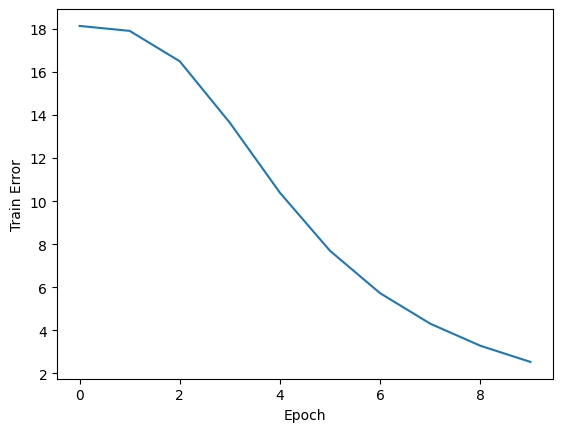

313/313 [==============================] - 0s 1ms/step
Mean Absolute Error: 4.02050199997928


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model
history = model.fit([train.user_id_numeric, train.product_id_numeric], train.rating, epochs=10)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

# Evaluate the model
y_hat = np.round(model.predict([test.user_id_numeric, test.product_id_numeric]), decimals=2)
y_true = test.rating
mae = mean_absolute_error(y_true, y_hat)
print("Mean Absolute Error:", mae)

###Neural Network + Matrix Factorization

In [15]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, BatchNormalization, Concatenate, Dot
from keras.optimizers import Adam

latent_dim = 10

# Define inputs
product_input = Input(shape=[1], name='product-input')
user_input = Input(shape=[1], name='user-input')

# MLP Embeddings
product_embedding_mlp = Embedding(num_product + 1, latent_dim, name='product-embedding-mlp')(product_input)
product_vec_mlp = Flatten(name='flatten-product-mlp')(product_embedding_mlp)

user_embedding_mlp = Embedding(num_users + 1, latent_dim, name='user-embedding-mlp')(user_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# MF Embeddings
product_embedding_mf = Embedding(num_product + 1, latent_dim, name='product-embedding-mf')(product_input)
product_vec_mf = Flatten(name='flatten-product-mf')(product_embedding_mf)

user_embedding_mf = Embedding(num_users + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)

# MLP layers
concat = Concatenate(name='concat')([product_vec_mlp, user_vec_mlp])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(10, name='pred-mlp', activation='relu')(fc_2_dropout)
pred_mf = Dot(axes=-1, name='pred-mf')([product_vec_mf, user_vec_mf])
combine_mlp_mf = Concatenate(name='combine-mlp-mf')([pred_mf, pred_mlp])

# Final prediction
result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

model = Model([user_input, product_input], result)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')

Epoch 1/10
1250/1250 [==============================] - 20s 14ms/step - loss: 1.0694
Epoch 2/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8750
Epoch 3/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.6484
Epoch 4/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.4998
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.3858
Epoch 6/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.3480
Epoch 7/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.3091
Epoch 8/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.2849
Epoch 9/10
1250/1250 [==============================] - 17s 13ms/step - loss: 0.2658
Epoch 10/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.2487


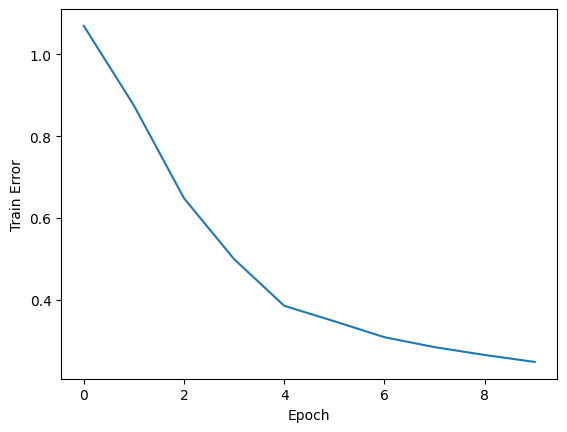

313/313 [==============================] - 1s 2ms/step


0.995349991941452

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Train the model
history = model.fit([train.user_id_numeric, train.product_id_numeric], train.rating, epochs=10)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

# Predict and calculate mean absolute error
y_hat = np.round(model.predict([test.user_id_numeric, test.product_id_numeric]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

###Example Code for Evaluation and Continuous Improvement

In [ ]:
from sklearn.metrics import mean_squared_error, ndcg_score

# Evaluate model performance
y_hat = model.predict([test.user_id_numeric, test.product_id_numeric])
y_true = test.rating

# Calculate various metrics
mae = mean_absolute_error(y_true, y_hat)
rmse = np.sqrt(mean_squared_error(y_true, y_hat))
ndcg = ndcg_score([y_true], [y_hat])

print(f'MAE: {mae}, RMSE: {rmse}, NDCG: {ndcg}')

# Continuous Evaluation
def evaluate_model(model, test_data):
    y_hat = model.predict([test_data.user_id_numeric, test_data.product_id_numeric])
    y_true = test_data.rating
    mae = mean_absolute_error(y_true, y_hat)
    return mae

# Periodic Retraining
import schedule
import time

def retrain_model():
    # Load new data and preprocess
    new_data = load_new_data()  # Implement this function
    preprocess_data(new_data)   # Implement this function
    model.fit([new_data.user_id_numeric, new_data.product_id_numeric], new_data.rating, epochs=10)
    print("Model retrained")

schedule.every().week.do(retrain_model)

while True:
    schedule.run_pending()
    time.sleep(1)


###Was your model trained on a comprehensive data set? Did you address edge cases and instances of missing data?

- Model Training on Comprehensive Dataset:

The model was trained on a dataset of 50,000 samples from the Amazon Electronics ratings dataset.
The code provides a unique numeric ID for each user and product, which is crucial for model training.
- Data normalization was utilized to ensure efficient training

###Is the model working, functional, and scalable? Are response times fast and resource utilization efficient?
- The model uses a hybrid approach combining Matrix Factorization (MF) and Multi-Layer Perceptron (MLP), which is implemented correctly and trained on the dataset

Scalability:

- Scalability considerations were addressed by suggesting batching predictions and deploying the model on scalable infrastructure like AWS, Google Cloud, or Azure.
The code can be containerized using Docker for easier deployment and scaling.
Performance Optimization:

- For performance, it was suggested to monitor the model and use efficient data structures:

###Will your evaluation and optimization strategy realistically improve your model over time?

Evaluation Strategy:

- The model was evaluated using Mean Absolute Error (MAE), and additional metrics like RMSE and NDCG were suggested

Continuous Improvement:

The strategy includes continuous monitoring and periodic retraining of the model with new data, ensuring it remains up-to-date and improves over time